In [1]:
import pandas as pd
import numpy as np
import matplotlib .pyplot as plt
import seaborn as sns
import sklearn


In [12]:
df=pd.read_csv('banknote.csv',names=['variance','skewness','curtosis','entropy','class'],index_col = False)
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [13]:
df.tail()

,variance,skewness,curtosis,entropy,class
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1
1371,-2.54190,-0.65804,2.6842,1.19520,1


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
variance    1372 non-null float64
skewness    1372 non-null float64
curtosis    1372 non-null float64
entropy     1372 non-null float64
class       1372 non-null int64
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')

In [16]:
df.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


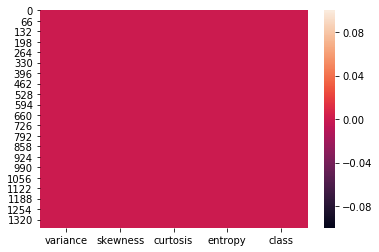

In [17]:
sns.heatmap(df.isnull())

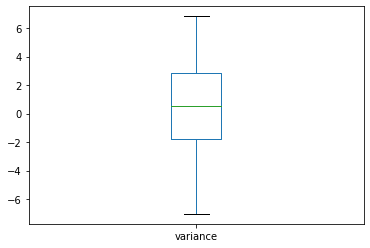

In [18]:
df['variance'].plot.box()

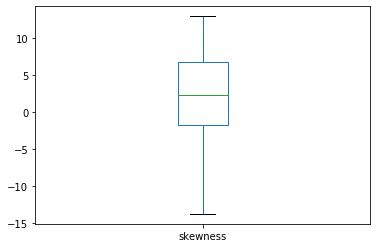

In [19]:
df['skewness'].plot.box()

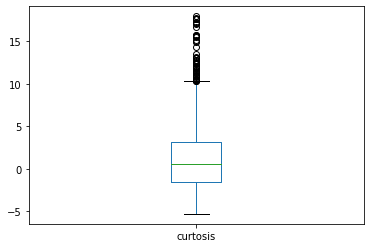

In [20]:
df['curtosis'].plot.box()

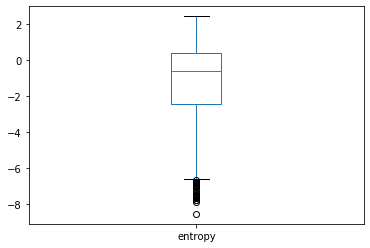

In [21]:
df['entropy'].plot.box()

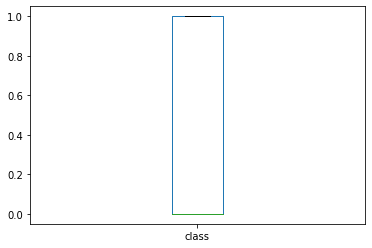

In [22]:
df['class'].plot.box()

variance       AxesSubplot(0.125,0.657941;0.227941x0.222059)
skewness    AxesSubplot(0.398529,0.657941;0.227941x0.222059)
curtosis    AxesSubplot(0.672059,0.657941;0.227941x0.222059)
entropy        AxesSubplot(0.125,0.391471;0.227941x0.222059)
class       AxesSubplot(0.398529,0.391471;0.227941x0.222059)
dtype: object

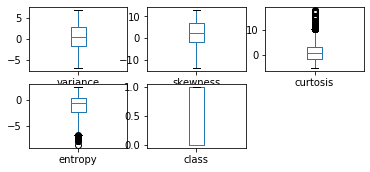

In [23]:
df.plot(kind='box',subplots=True,layout=(3,3))

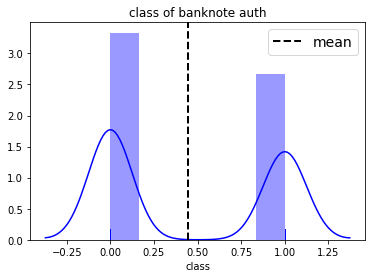

In [33]:
plt.figure(figsize=(6,4))
sns.distplot(df["class"],color="b",rug=True)
plt.axvline(df["class"].mean(),
           linestyle="dashed",color="k",
           label='mean',linewidth=2)
plt.legend(loc="best",prop={"size":14})
plt.title("class of banknote auth")
plt.show()

In [34]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[1.12180565, 1.14945512, 0.97597007, 0.35456135, 0.89472059],
       [1.44706568, 1.06445293, 0.89503626, 0.12876744, 0.89472059],
       [1.20780971, 0.77735215, 0.12221838, 0.61807317, 0.89472059],
       ...,
       [1.47235682, 2.62164576, 3.75901744, 0.75488418, 1.11766736],
       [1.40669251, 1.75647104, 2.552043  , 0.04315848, 1.11766736],
       [1.04712236, 0.43982168, 0.29861555, 1.1364645 , 1.11766736]])

In [35]:
threshold=3
print(np.where(z>3))

(array([  45,   47,  194,  202,  291,  394,  465,  529,  562,  581,  740,
        765,  820,  826,  881,  887,  942,  948,  974, 1003, 1009, 1064,
       1070, 1125, 1131, 1142, 1186, 1192, 1203, 1218, 1247, 1253, 1264,
       1308, 1314, 1369], dtype=int64), array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2,
       2, 2, 2, 3, 2, 2, 3, 3, 2, 2, 3, 2, 2, 2], dtype=int64))


In [36]:
z[45][1]

1.3028920081816546

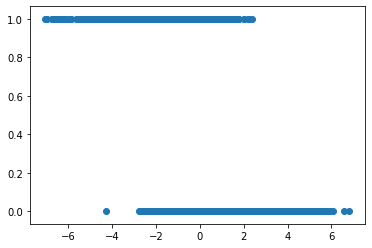

In [37]:
plt.scatter(df['variance'],df['class'])

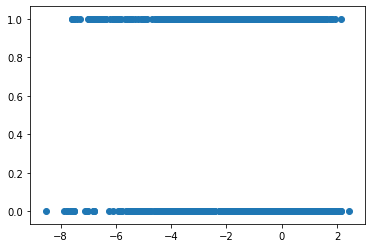

In [38]:
plt.scatter(df['entropy'],df['class'])

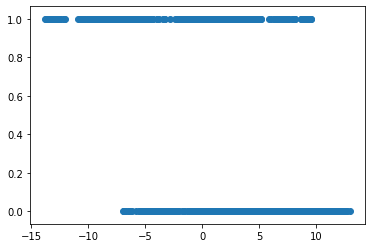

In [40]:
plt.scatter(df['skewness'],df['class'])

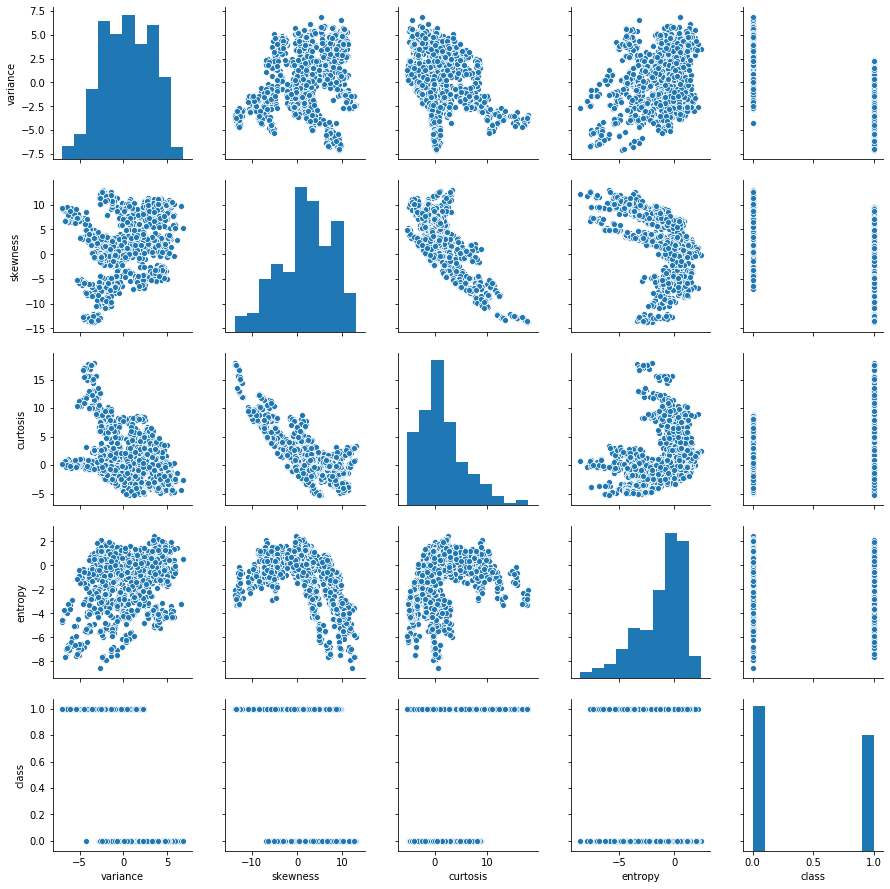

In [41]:
sns.pairplot(df)


<function matplotlib.pyplot.show(*args, **kw)>

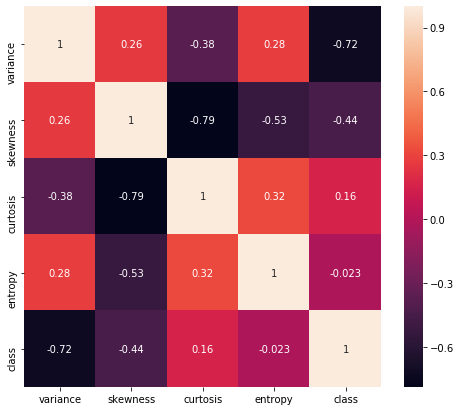

In [42]:
corr_hmap=df.corr()
plt.figure(figsize=(8,7))
sns.heatmap(corr_hmap,annot=True)
plt.show

In [43]:
df_new=df[(z<3).all(axis=1)]

In [44]:
df_new.shape

(1336, 5)

In [45]:
df.shape

(1372, 5)

In [46]:
x=df.iloc[:,0:-1]
x.head()

,variance,skewness,curtosis,entropy
0,3.62160,8.6661,-2.8073,-0.44699
1,4.54590,8.1674,-2.4586,-1.46210
2,3.86600,-2.6383,1.9242,0.10645
3,3.45660,9.5228,-4.0112,-3.59440
4,0.32924,-4.4552,4.5718,-0.98880


In [47]:
y=df.iloc[:,-1]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: class, dtype: int64

In [48]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [49]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
lr.score(x_train,y_train)
predlr=lr.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

0.9878640776699029
[[226   3]
 [  2 181]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       229
           1       0.98      0.99      0.99       183

    accuracy                           0.99       412
   macro avg       0.99      0.99      0.99       412
weighted avg       0.99      0.99      0.99       412



In [50]:
svc=SVC()
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

1.0
[[229   0]
 [  0 183]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       229
           1       1.00      1.00      1.00       183

    accuracy                           1.00       412
   macro avg       1.00      1.00      1.00       412
weighted avg       1.00      1.00      1.00       412



From Above Prediction Analysis we can say that both Logistic and Support Vector Classifier is good model with 100% accuracy score